In [1]:
from pathlib import Path
import os
import time # To potentially measure time

# --- Configuration ---
# Base path to the 'test' directory relative to your script
# (assuming your script is in the ASLT project root)
base_test_path_str = "/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train"
base_test_path = Path(base_test_path_str)

# Range of the main numbered folders
start_folder_num = 71
end_folder_num = 170 # Inclusive

# File extension(s) to look for
image_extension = "*.jpg"

# --- Logic ---
all_image_files = []
start_time = time.time()

print(f"Scanning folders from {start_folder_num:04d} to {end_folder_num:04d} in '{base_test_path}'...")

# Loop through the main numbered folders (0071, 0072, ...)
for i in range(start_folder_num, end_folder_num + 1):
    # Format number with leading zeros (e.g., 71 -> "0071")
    folder_name = f"{i:04d}"
    numbered_folder_path = base_test_path / folder_name

    if numbered_folder_path.is_dir():
        # print(f"Processing folder: {numbered_folder_path}") # Uncomment for detailed logging

        # Loop through items inside the numbered folder (e.g., 0071)
        # We expect subfolders here (like 03_01_0071_(...)_c)
        for item_path in numbered_folder_path.iterdir():
            # Check if the item is a directory (a timestamped subfolder)
            if item_path.is_dir():
                # print(f"  Scanning subfolder: {item_path.name}") # Uncomment for detailed logging

                # Find all images within this timestamped subfolder
                images_in_subfolder = list(item_path.glob(image_extension))

                if images_in_subfolder:
                    # print(f"    Found {len(images_in_subfolder)} images.") # Uncomment for detailed logging
                    all_image_files.extend(images_in_subfolder)
                # else:
                    # print(f"    No '{image_extension}' images found.") # Uncomment for detailed logging
            # else:
                # print(f"  Skipping non-directory item: {item_path.name}") # Uncomment for detailed logging

    # else:
        # print(f"Skipping - Folder not found: {numbered_folder_path}") # Uncomment if needed

end_time = time.time()
duration = end_time - start_time

print("-" * 30)
print(f"Scan complete in {duration:.2f} seconds.")
print(f"Total image files found: {len(all_image_files)}")

# --- Optional: Process the found files ---
# You now have a list 'all_image_files' containing Path objects
# for every .jpg found in the specified structure.

# Example: Print the first 10 file paths found
if all_image_files:
    print("\nFirst 10 image paths found:")
    for img_path in all_image_files[:10]:
        print(img_path) # Prints the full path


Scanning folders from 0071 to 0170 in '/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train'...
------------------------------
Scan complete in 2.78 seconds.
Total image files found: 614337

First 10 image paths found:
/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0015.jpg
/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0042.jpg
/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0040.jpg
/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0001.jpg
/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071

In [2]:
import pandas as pd
labels_file = pd.read_excel("/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/KARSL-100_Labels.xlsx")  # Adjust the path to your labels file

# Load the labels file into a DataFrame
df_labels =  pd.read_excel("/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/KARSL-100_Labels.xlsx")

# Prepare a list to store the sequences and their corresponding Arabic labels
image_sequences_with_labels = []

# Iterate through the numbered folders
for i in range(start_folder_num, end_folder_num + 1):
    # Format the folder name with leading zeros
    folder_name = f"{i:04d}"
    numbered_folder_path = base_test_path / folder_name

    if numbered_folder_path.is_dir():
        # Find the corresponding row in df_labels
        label_row = df_labels[df_labels['SignID'] == i]
        if not label_row.empty:
            arabic_label = label_row['Sign-Arabic'].values[0]

            # Iterate through timestamped subfolders

            for subfolder in numbered_folder_path.iterdir():
                if subfolder.is_dir():
                    # Collect the sequence of .jpg file paths in order
                    image_sequence = sorted(subfolder.glob(image_extension))
                    if image_sequence:
                        # Store the sequence and its Arabic label
                        image_sequences_with_labels.append((image_sequence, arabic_label))

# Example: Print the first 5 sequences with labels
print("First 5 sequences with labels:")
for sequence, label in image_sequences_with_labels[:5]:
    print(f"Label: {label}, Sequence: {[str(img) for img in sequence]}")

First 5 sequences with labels:
Label: هيكل عظمي, Sequence: ['/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0001.jpg', '/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0002.jpg', '/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0003.jpg', '/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0004.jpg', '/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_0071_(15_12_16_16_12_02)_c/03_03_0071_(15_12_16_16_12_02)_c_0005.jpg', '/home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train/0071/03_03_007

In [3]:
# Example: Load and process the first image found (if any)
# (Requires Pillow or OpenCV installed, see previous example)
if all_image_files:
    from PIL import Image
    try:
        first_image = Image.open(all_image_files[0])
        print(f"\nSuccessfully loaded the first image: {all_image_files[0].name}")
        print(f"Format: {first_image.format}, Size: {first_image.size}, Mode: {first_image.mode}")
    except Exception as e:
        print(f"\nError loading first image {all_image_files[0].name}: {e}")


Successfully loaded the first image: 03_03_0071_(15_12_16_16_12_02)_c_0015.jpg
Format: JPEG, Size: (256, 256), Mode: RGB


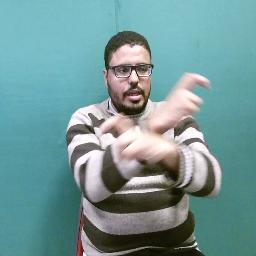

In [4]:
first_image

In [ ]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# --- Prepare Data ---

# 1. Build a mapping from Sign-Arabic to SignID and Sign-English
label_map = df_labels.set_index('Sign-Arabic')[['SignID', 'Sign-English']].to_dict(orient='index')

# 2. Prepare X (images) and y (labels as SignID)
X = []
y = []
img_size = (64, 64)  # Example size, adjust as needed

for sequence, arabic_label in image_sequences_with_labels:
    sign_id = label_map[arabic_label]['SignID']
    for img_path in sequence:
        img = Image.open(img_path).convert('RGB').resize(img_size)
        X.append(img_to_array(img) / 255.0)
        y.append(sign_id)

X = np.array(X)
y = np.array(y)

# 3. Encode labels as categorical
unique_ids = sorted(df_labels['SignID'].unique())
id_to_idx = {sid: idx for idx, sid in enumerate(unique_ids)}
y_idx = np.array([id_to_idx[sid] for sid in y])
y_cat = to_categorical(y_idx, num_classes=len(unique_ids))

# --- Build CNN Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(unique_ids), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train Model ---
model.fit(X, y_cat, epochs=10, batch_size=32, validation_split=0.1)

# --- Example: Predict and map back to SignID, Sign-Arabic, Sign-English ---
preds = model.predict(X[:5])
pred_classes = np.argmax(preds, axis=1)
idx_to_id = {v: k for k, v in id_to_idx.items()}
for i, pred_idx in enumerate(pred_classes):
    sign_id = idx_to_id[pred_idx]
    row = df_labels[df_labels['SignID'] == sign_id].iloc[0]
    print(f"Predicted: SignID={row['SignID']}, Arabic={row['Sign-Arabic']}, English={row['Sign-English']}")

In [ ]:
ls /home/jupyter/.cache/kagglehub/datasets/shah110/karsl-100/versions/1/KArSL-100/train


In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7888716080730741657
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328528896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10014147213142853622
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


I0000 00:00:1745404058.140340   26408 gpu_device.cc:2019] Created device /device:GPU:0 with 13664 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.debugging.set_log_device_placement(True)